In [1]:
import pandas as pd

In [2]:
database_url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(database_url)

In [3]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
dados["Valor"].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [5]:
dados["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [6]:
dados["Valor"].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [7]:
dados["Valor"].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [8]:
len(dados["Valor"].str.split(expand = True)[1].unique())

1038

In [9]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [10]:
dados[["Valor", "Bairro"]]

,Valor,Bairro
0,R$ 7.000.000,Planalto Paulista
1,R$ 3.700.000,Jardim dos Estados
2,R$ 380.000,Jardim Reimberg
3,R$ 685.000,Jardim Morumbi
4,R$ 540.000,Mooca
...,...,...
10003,R$ 665.000,Vila Sofia
10004,R$ 2.300.000,Bosque da Saúde
10005,R$ 1.050.000,Vila da Saúde
10006,R$ 2.200\n /Mês,Vila Oratório


In [11]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [12]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [13]:
dados_filtrados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_filtrados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [14]:
dados_filtrados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [15]:
dados_filtrados_vendas["Valor_anuncio"] = dados_filtrados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)

C:\Users\josev\AppData\Local\Temp\ipykernel_22276\1218159392.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_filtrados_vendas["Valor_anuncio"] = dados_filtrados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)
C:\Users\josev\AppData\Local\Temp\ipykernel_22276\1218159392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados_vendas["Valor_anuncio"] = dados_filtrados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)


In [16]:
dados_filtrados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   object 
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   float64
 10  Tipo_anuncio   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


<AxesSubplot:ylabel='Frequency'>

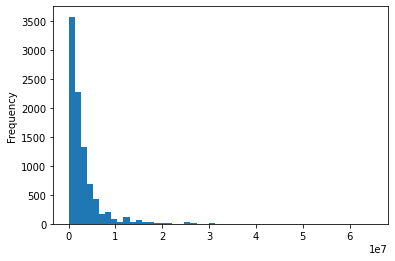

In [18]:
dados_filtrados_vendas["Valor_anuncio"].plot(kind = "hist", bins = 50)

In [21]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_filtrados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


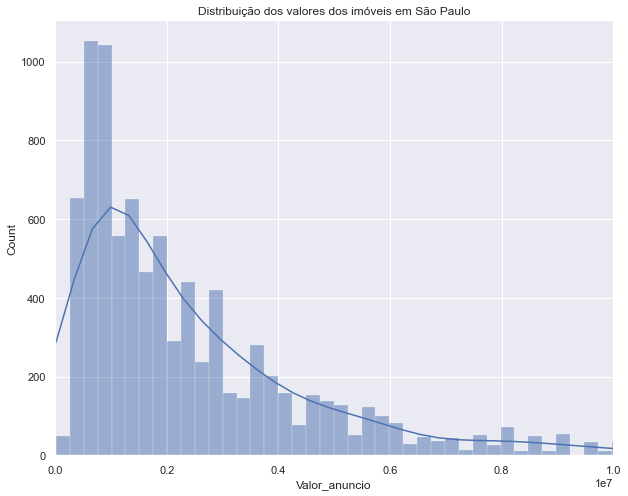

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize = (10,8))
ax = sns.histplot(x = "Valor_anuncio", data = dados_filtrados_vendas, kde = True)
ax.set_title("Distribuição dos valores dos imóveis em São Paulo")
plt.xlim((-50, 10**7))
plt.show()

In [13]:
dados["Valor"].str.replace("R$ ", "")

C:\Users\josev\AppData\Local\Temp\ipykernel_22224\1801887489.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dados["Valor"].str.replace("R$ ", "")


0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

# Desafios

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legíveis (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar uma visualização para analisar os quartis, mediana e outliers

In [15]:
dados["Valor"][0].replace("R$ ", "")

'7.000.000'

In [27]:
for row, data in dados.iterrows():
    dados["Valor"][row] = data["Valor"].replace("R$ ", "")

C:\Users\josev\AppData\Local\Temp\ipykernel_22224\3867909982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Valor"][row] = data["Valor"].replace("R$ ", "")


In [28]:
dados["Valor"]

0                                7.000.000
1                                3.700.000
2                                  380.000
3                                  685.000
4                                  540.000
                       ...                
10003                              665.000
10004                            2.300.000
10005                            1.050.000
10006    2.200\n                      /Mês
10007                              270.000
Name: Valor, Length: 10008, dtype: object